In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
df=pd.read_csv('bank-full.csv',sep=';')

In [38]:
features=['age',
'job',
'marital',
'education',
'balance',
'housing',
'contact',
'day',
'month',
'duration',
'campaign',
'pdays',
'previous',
'poutcome',
'y']

In [39]:
data=df[features]

In [40]:
data

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,no


In [41]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [42]:
df_full_train,df_test=train_test_split(data,test_size=0.2,random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_full_train=(df_full_train.y=='yes').values
y_train = (df_train.y == 'yes').values
y_val = (df_val.y == 'yes').values
y_test = (df_test.y == 'yes').values


del df_train['y']
del df_val['y']
del df_test['y']

In [43]:
data.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y'],
      dtype='object')

In [44]:
numerical=['balance',
'day',
'duration',
'previous']

In [45]:
df.dtypes[df.dtypes != 'object'].index

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [46]:
from sklearn.metrics import roc_auc_score , roc_curve

score = []

for num in numerical:
    auc = roc_auc_score(y_train, df_train[num])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[num])
    score.append((num, auc))

# 'score' now contains a list of tuples with (feature_name, auc_score)
for feature, auc_score in score:
    print(f"Feature: {feature}, AUC: {auc_score}")


Feature: balance, AUC: 0.5888313805382317
Feature: day, AUC: 0.525957882383908
Feature: duration, AUC: 0.8147002759670778
Feature: previous, AUC: 0.5985653242764153


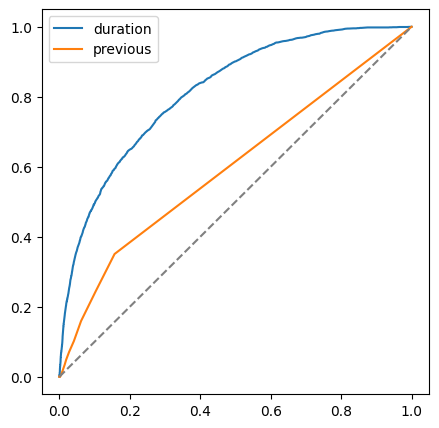

In [47]:
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_train, df_train.duration)
plt.plot(fpr, tpr, label='duration')

fpr, tpr, _ = roc_curve(y_train, df_train.previous)
plt.plot(fpr, tpr, label='previous')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

plt.legend()
plt.show()

In [48]:

train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = model.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

np.float64(0.9004159581551736)

In [49]:
def confusion_matrix_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    return df_scores
df_scores = confusion_matrix_dataframe(y_val, y_pred)
df_scores

,threshold,tp,fp,fn,tn
0,0.00,1098,7944,0,0
1,0.01,1094,7004,4,940
2,0.02,1093,5789,5,2155
3,0.03,1087,4745,11,3199
4,0.04,1068,3800,30,4144
...,...,...,...,...,...
96,0.96,30,17,1068,7927
97,0.97,25,15,1073,7929
98,0.98,21,10,1077,7934
99,0.99,11,5,1087,7939


In [50]:
df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores.fn)

In [51]:
df_scores.head(30)

,threshold,tp,fp,fn,tn,p,r
0,0.00,1098,7944,0,0,0.121433,1.000000
1,0.01,1094,7004,4,940,0.135095,0.996357
2,0.02,1093,5789,5,2155,0.158820,0.995446
3,0.03,1087,4745,11,3199,0.186385,0.989982
4,0.04,1068,3800,30,4144,0.219392,0.972678
5,0.05,1048,3076,50,4868,0.254122,0.954463
6,0.06,1020,2509,78,5435,0.289034,0.928962
7,0.07,993,2140,105,5804,0.316949,0.904372
8,0.08,969,1860,129,6084,0.342524,0.882514
9,0.09,945,1633,153,6311,0.366563,0.860656


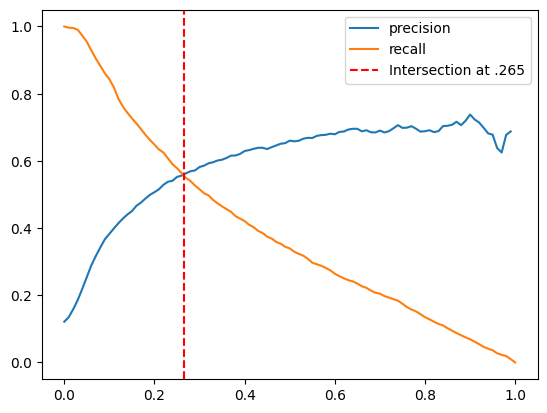

In [52]:
plt.plot(df_scores.threshold, df_scores.p, label='precision')
plt.plot(df_scores.threshold, df_scores.r, label='recall')
plt.axvline(.265, color='red', linestyle='--', label=f'Intersection at .265')
plt.legend()
plt.show()


In [53]:
df_scores['difference'] = np.abs(df_scores.p - df_scores.r)
min_diff_index = df_scores['difference'].idxmin()

In [54]:
min_diff_index

26

In [55]:
df_scores['f1']=2*df_scores['p']*df_scores['r']/(df_scores['p']+df_scores['r'])

In [56]:
df_scores

,threshold,tp,fp,fn,tn,p,r,difference,f1
0,0.00,1098,7944,0,0,0.121433,1.000000,0.878567,0.216568
1,0.01,1094,7004,4,940,0.135095,0.996357,0.861262,0.237930
2,0.02,1093,5789,5,2155,0.158820,0.995446,0.836626,0.273935
3,0.03,1087,4745,11,3199,0.186385,0.989982,0.803596,0.313709
4,0.04,1068,3800,30,4144,0.219392,0.972678,0.753286,0.358029
...,...,...,...,...,...,...,...,...,...
96,0.96,30,17,1068,7927,0.638298,0.027322,0.610975,0.052402
97,0.97,25,15,1073,7929,0.625000,0.022769,0.602231,0.043937
98,0.98,21,10,1077,7934,0.677419,0.019126,0.658294,0.037201
99,0.99,11,5,1087,7939,0.687500,0.010018,0.677482,0.019749


In [57]:
df_scores['f1'].idxmax()

22

In [58]:
df_scores.iloc[22]

threshold        0.220000
tp             686.000000
fp             611.000000
fn             412.000000
tn            7333.000000
p                0.528913
r                0.624772
difference       0.095859
f1               0.572860
Name: 22, dtype: float64

In [59]:

columns = ['age',
 'job',
 'marital',
 'education',
 'balance',
 'housing',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [60]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df[columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [61]:
scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.y.values
    y_val = df_val.y.values

    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.906 +- 0.006


In [62]:
C = 1.0
n_splits = 5

In [63]:
kfold = KFold(n_splits, shuffle=True, random_state=1)

scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.y.values
    y_val = df_val.y.values

    dv, model = train(df_train, y_train, C=C)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('C=%4s, %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C= 1.0, 0.906 +- 0.006


In [64]:
del df_full_train['y']

In [65]:
dv, model = train(df_full_train,y_full_train , C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

np.float64(0.9069568014870156)

SAVING THE MODEL

In [66]:
import pickle

In [67]:
output_file = f'model_C={C}.bin'
output_file

'model_C=1.0.bin'

In [68]:
f_out = open(output_file,'wb')
pickle.dump((dv,model),f_out)
f_out.close()